In [1]:
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

from thermoengine.const import units
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

from tcg_slb.phasediagram.equilibrate import EquilibratePD, EquilibratePDGrid, PDEquilibrateGridDiagnostics
from tcg_slb.base import *
from thermoengine.equilibrate import PhaseLibrary
import thermoengine as thermo
import json
import pickle

with open("sammon.json") as json_file:
    comps = json.load(json_file)

comp = thermo.OxideWtComp(**comps["LC"])

/Users/mmcmillan31/Library/Python/3.9/lib/python/site-packages/numdifftools/extrapolation.py:10: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d
/Users/mmcmillan31/Library/Python/3.9/lib/python/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


In [2]:

db = thermo.model.Database(database='Berman')

phases = db.get_phases([
        "Qz",
        "Grt",  
        "Jd","Aeg","CaTs","cEn",
        "Di","En","Fs",
        "Fsp",
        "Rt","Ilm",
])

phase_library = PhaseLibrary(phases)

reload = True


filename = os.path.join('output', 'equilibrate_berman-sammon-LC.pickle')

if reload:
    pfile = open(filename, 'rb')
    equilgridB = pickle.load(pfile)
    pfile.close()
else:
    Tmin = 573
    Tmax = 1273
    nT = 30
    Trange = np.linspace(Tmin,Tmax,nT)
    Pmin = 0
    Pmax = 2.5
    nP = 30
    Prange = np.linspace(Pmin,Pmax,nP)
    print(Prange)
    equilgridB = EquilibratePDGrid()
    equilgridB.solve(phase_library, ['T', 'p'], Trange, Prange,**{'comp':comp})

save = True

if not reload and save:
        pfile = open(filename, 'wb')
        pickle.dump(equilgridB, pfile)
        pfile.close()

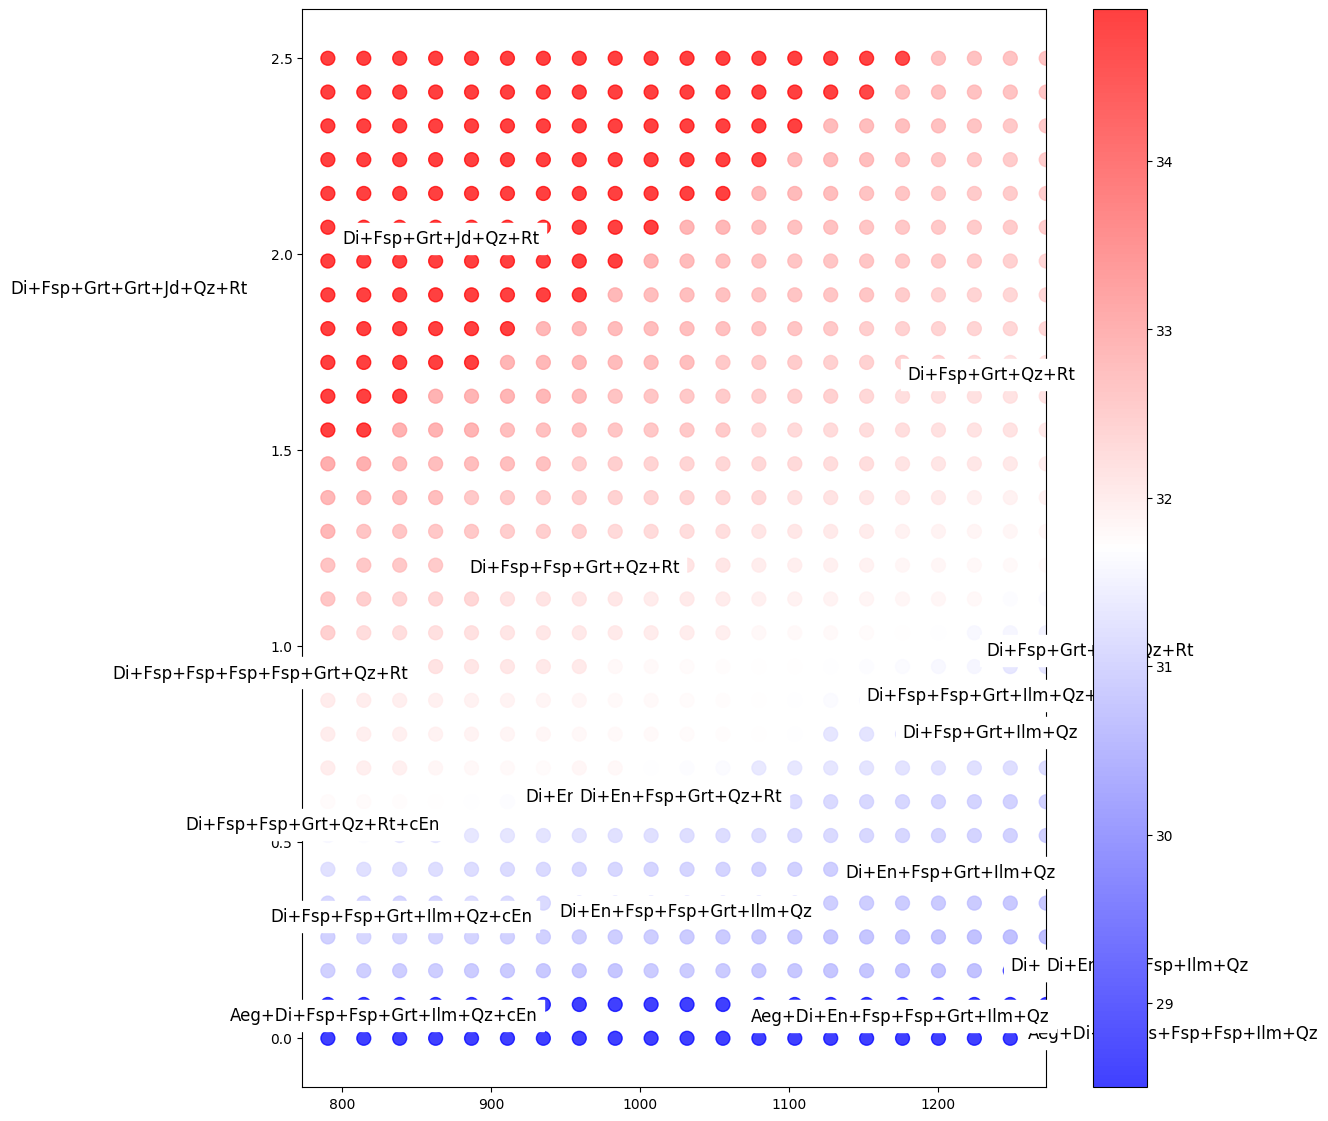

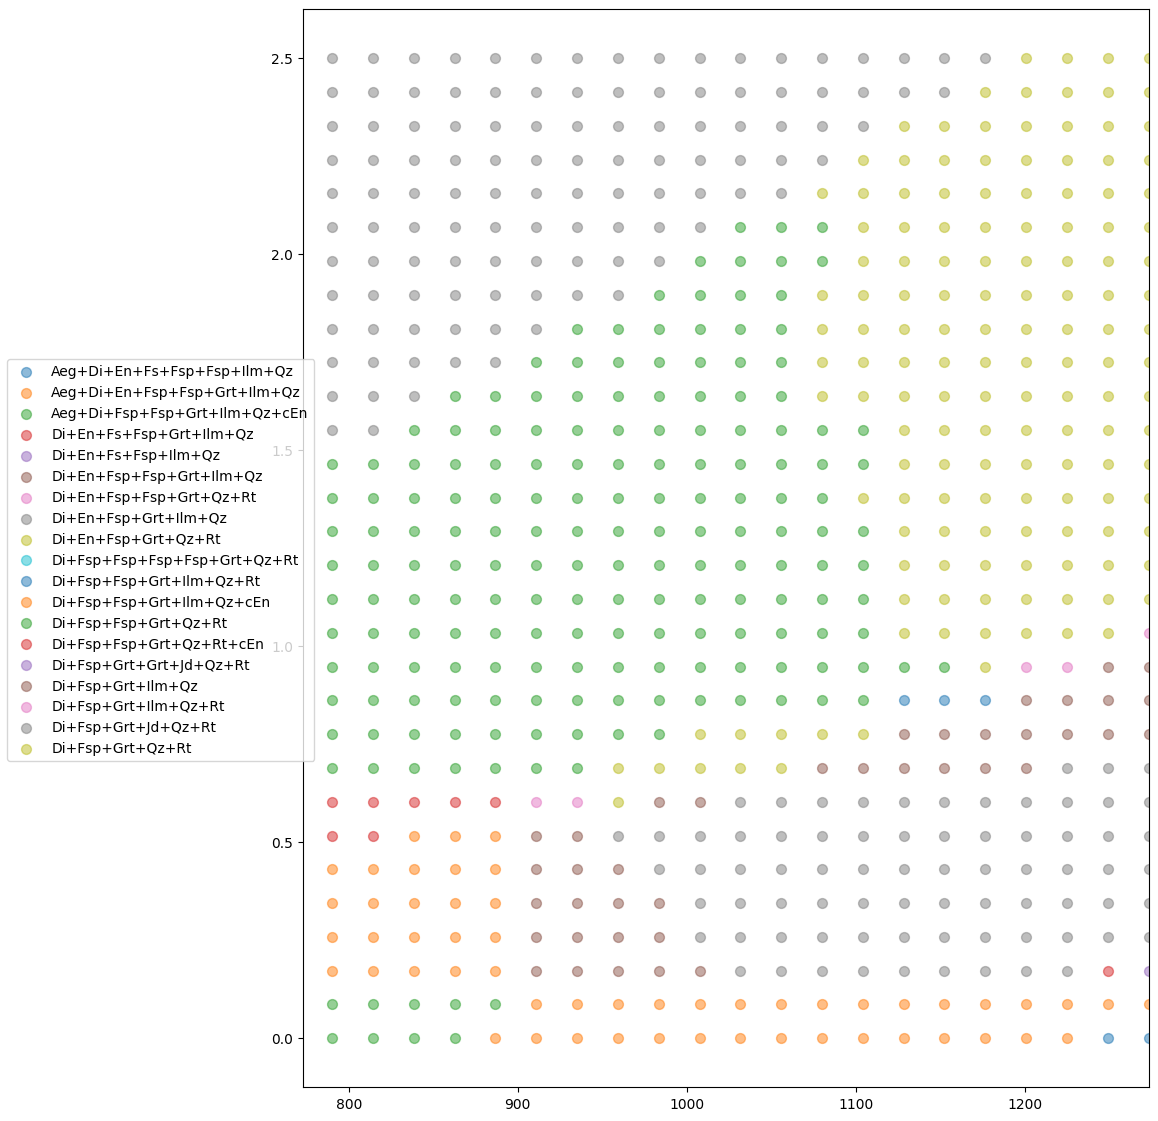

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

def decorate(pdrgd):
    def new_setup_axes(self,axi):
        axi.set_xlim([773,1273])
        return axi

    #replace the display with newdisplay
    pdrgd.setup_axes = new_setup_axes
    
    #return the modified student 
    return pdrgd

equildiagB = decorate(PDEquilibrateGridDiagnostics)(phase_library, equilgridB)
equildiagB.plot_rho()
equildiagB.plot_phases()



In [9]:
db = thermo.model.Database(database='Stixrude')

phases = db.get_phases([
        "Qz",
        "Grt",  
        "Cpx",
        "Opx",
        "Ky",
        "Fsp"
        #"Rt","Ilm",
        #"Mc"
])
phase_library = PhaseLibrary(phases)

reload = False


import pickle

filename = os.path.join('output', 'equilibrate_stixrude-sammon-LC.pickle')

if reload:
    pfile = open(filename, 'rb')
    equilgrid = pickle.load(pfile)
    pfile.close()
else:
    Tmin = 773
    Tmax = 1273
    nT = 60
    Trange = np.linspace(Tmin,Tmax,nT)
    Pmin = 0
    Pmax = 2.5
    nP = 60
    Prange = np.linspace(Pmin,Pmax,nP)
    print(Prange)
    equilgrid = EquilibratePDGrid()
    equilgrid.solve(phase_library, ['T', 'p'], Trange, Prange,**{'comp':comp})

save = True

if not reload and save:
        pfile = open(filename, 'wb')
        pickle.dump(equilgrid, pfile)
        pfile.close()

[0.         0.04237288 0.08474576 0.12711864 0.16949153 0.21186441
 0.25423729 0.29661017 0.33898305 0.38135593 0.42372881 0.46610169
 0.50847458 0.55084746 0.59322034 0.63559322 0.6779661  0.72033898
 0.76271186 0.80508475 0.84745763 0.88983051 0.93220339 0.97457627
 1.01694915 1.05932203 1.10169492 1.1440678  1.18644068 1.22881356
 1.27118644 1.31355932 1.3559322  1.39830508 1.44067797 1.48305085
 1.52542373 1.56779661 1.61016949 1.65254237 1.69491525 1.73728814
 1.77966102 1.8220339  1.86440678 1.90677966 1.94915254 1.99152542
 2.03389831 2.07627119 2.11864407 2.16101695 2.20338983 2.24576271
 2.28813559 2.33050847 2.37288136 2.41525424 2.45762712 2.5       ]


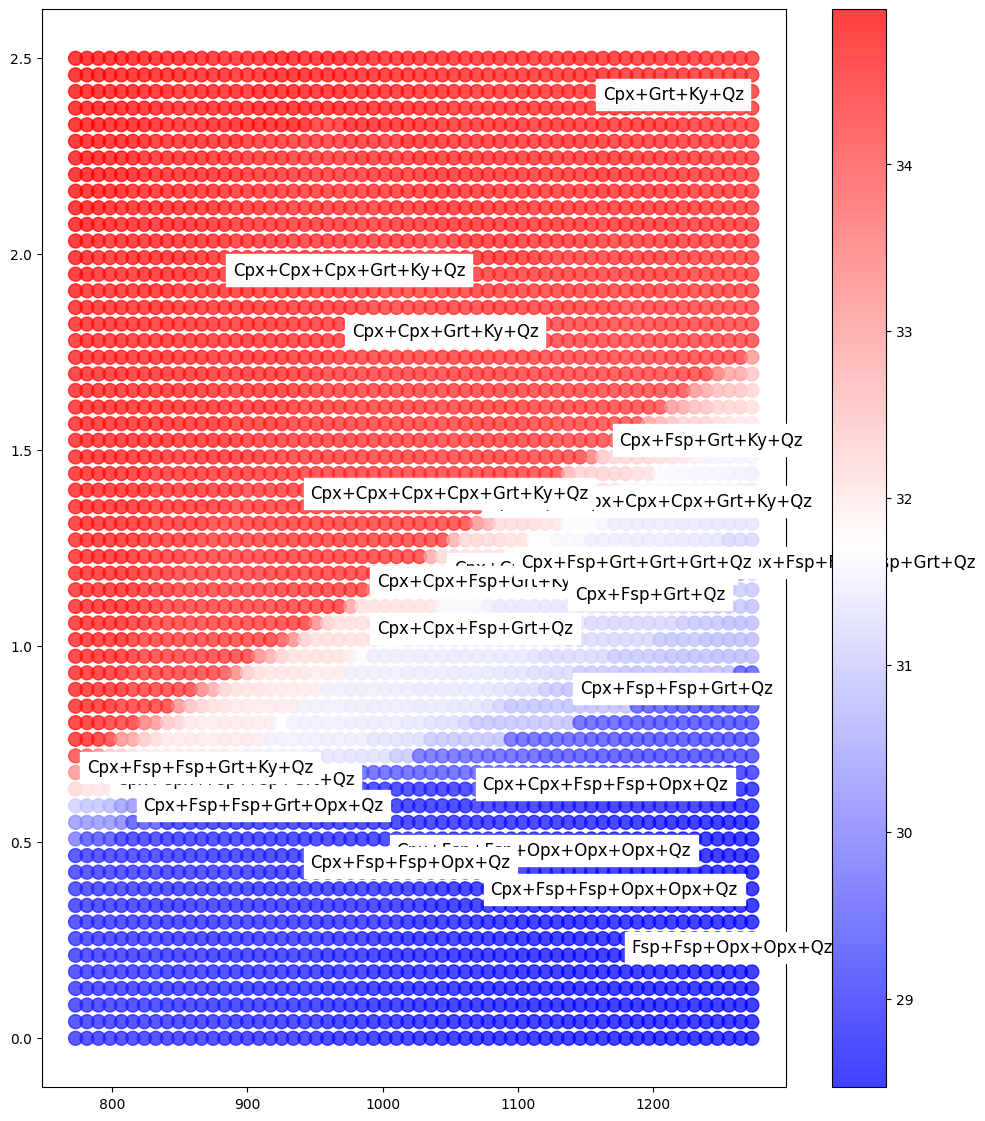

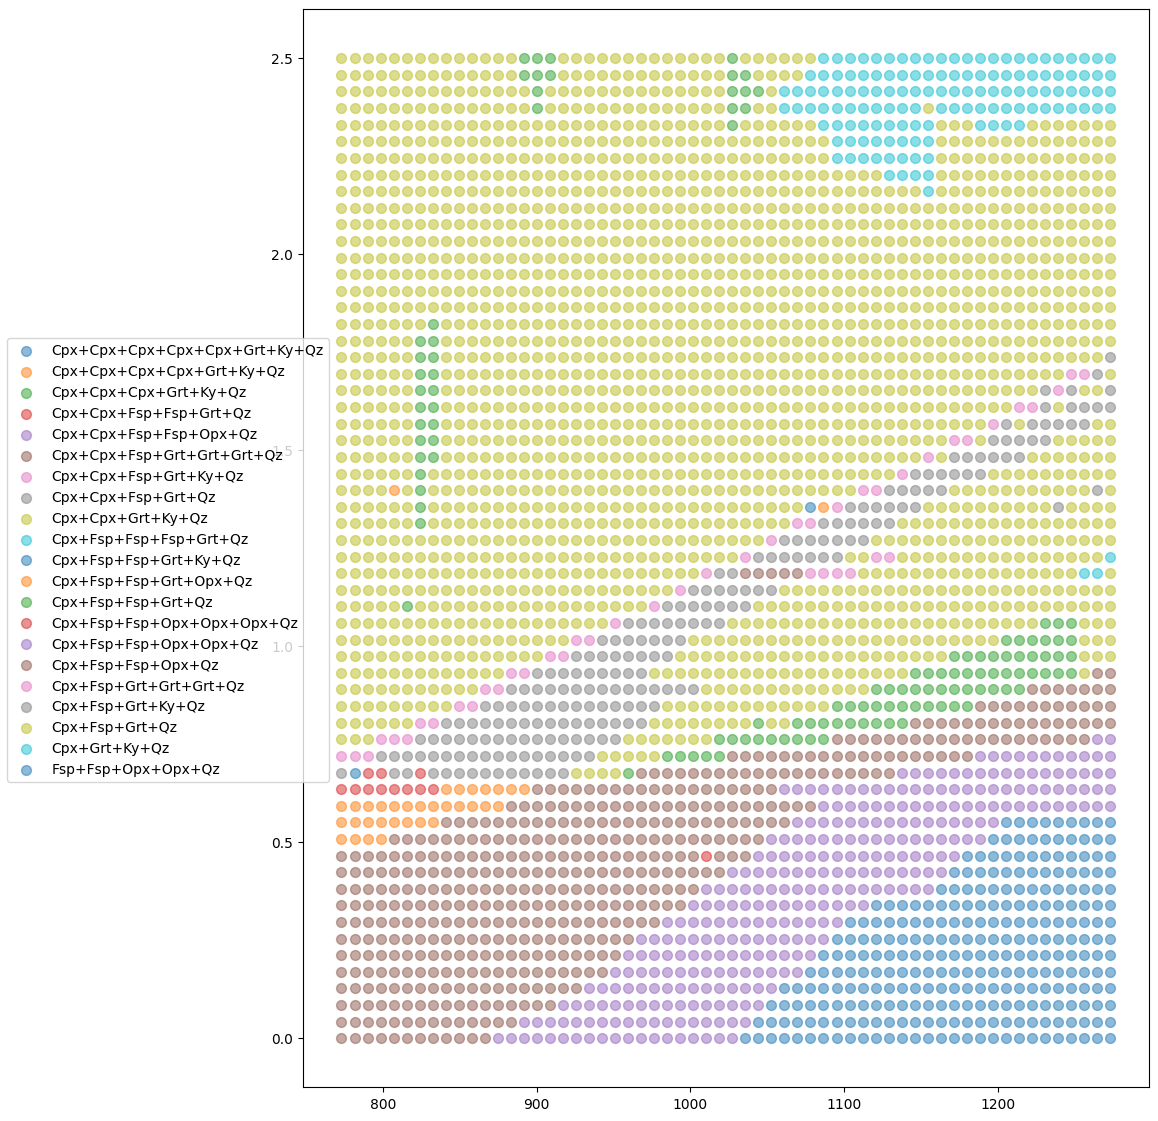

In [11]:
equildiag = PDEquilibrateGridDiagnostics(phase_library, equilgrid)
equildiag.plot_rho()
equildiag.plot_phases()

Aff = 9.083989257342182
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200000  0.000000  0.100000  0.000000  0.00
Ab   0.076923  0.00  0.076923  0.230769  0.000000  0.000000  0.000000  0.00
An   0.000000  0.00  0.153846  0.153846  0.000000  0.076923  0.000000  0.00
Rt   0.000000  0.00  0.000000  0.000000  0.000000  0.000000  0.333333  0.00
Mc   0.000000  0.00  0.076923  0.230769  0.076923  0.000000  0.000000  0.00
Grt  0.000000  0.06  0.100000  0.150000  0.000000  0.000000  0.000000  0.09
Grt  0.000000  0.03  0.100000  0.150000  0.000000  0.000000  0.000000  0.12
---
Qz [1.]
Di [1.]
Ab [1.]
An [1.]
Rt [1.]
Mc [1.]
Grt [0.6 0.  0.4]
Grt [0.8 0.  0.2]
Aff = 2.6315751802758314
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
cEn  0.000000  0.20  0.0000

[array([[ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        ...,
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ]]),
 array([[ 5000.        ,  5000.        ,  5000.        , ...,
          5000.        ,  5000.        ,  5000.        ],
        [ 5408.16326531,  5408.16326531,  5408.16326531, ...,
          5408.16326531,  5408.16326531,  5408.16326531],
        [ 5816.32653061,  5816.32653061,  5816.32653061, ...,

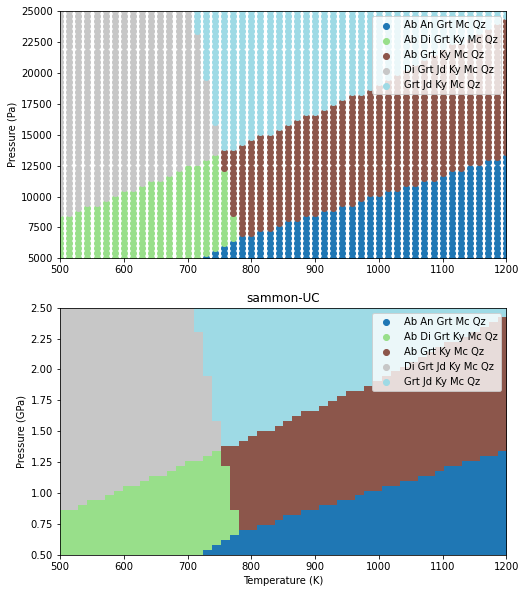

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
#from __future__ import annotations # Enable Python 4 type hints in Python 3
from thermoengine.equilibrate import PhaseLibrary, GibbsMinimizer, System
import thermoengine as thermo
from thermoengine.const import units
from thermoengine.core import UnorderedList
import os
import contextlib
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
import matplotlib.colors as mcolors
import thermoengine as thermo

Tmin = 500
Tmax = 1200
nT = 2

Pmin = 0.5*units.GPA
Pmax = 2.5*units.GPA
nP = 2

T = np.linspace(Tmin,Tmax,nT)
P = np.linspace(Pmin,Pmax,nP)

phase_symbols_berman = [
    "Qz", "Coe",
    "Grt",  
    'Di','Jd','cEn', #'Cpx'
    'En', 'Fs',
    "Ky",
    "Ab", "An",
    "Rt",
    "Mc"
]

oxides={
        "SiO2"  : 68.0,
        "TiO2"  : 0.66,
        "Al2O3" : 15.1, 
        "FeO"   : 5.21,
        "MnO"   : 0.10, 
        "MgO"   : 2.29, 
        "CaO"   : 2.75, 
        "Na2O"  : 2.63, 
        "K2O"   : 3.11,
        "P2O5"  : 0.17,
    }

Tmin = np.amin(T)
Tmax = np.amax(T)
Pmin = np.amin(P)
Pmax = np.amax(P)

oxide_comp = thermo.OxideWtComp(**oxides)

db = thermo.model.Database(database='Berman')
phases = db.get_phases(phase_symbols_berman)
phase_library = PhaseLibrary(phases)

system = System(
    T=800,
    P=0.25*units.GPA,
    comp=oxide_comp,
    options={'grid_spacing':0.2},
    phase_library=phase_library,
    affinity_thresh=1000.
)

Aff = 9.086573071079329
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200000  0.000000  0.100000  0.000000  0.00
Ab   0.076923  0.00  0.076923  0.230769  0.000000  0.000000  0.000000  0.00
An   0.000000  0.00  0.153846  0.153846  0.000000  0.076923  0.000000  0.00
Rt   0.000000  0.00  0.000000  0.000000  0.000000  0.000000  0.333333  0.00
Mc   0.000000  0.00  0.076923  0.230769  0.076923  0.000000  0.000000  0.00
Grt  0.000000  0.06  0.100000  0.150000  0.000000  0.000000  0.000000  0.09
Grt  0.000000  0.03  0.100000  0.150000  0.000000  0.000000  0.000000  0.12
---
Qz [1.]
Di [1.]
Ab [1.]
An [1.]
Rt [1.]
Mc [1.]
Grt [0.6 0.  0.4]
Grt [0.8 0.  0.2]
Aff = 2.632336519891396
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
cEn  0.000000  0.20  0.00000

array(['Ab', 'An', 'Grt', 'Mc', 'Qz', 'Rt', 'cEn'], dtype='<U3')

1000